# Persistence

The programs we have written so far are volatile. This means that once they finish and their output disappears nothing is left: if we want again their output we need to run the program again.

Programs can achieve persistence by storing data in files that are written in permanent storage (e.g. hard drive, flash memory). 

In this section of the course you'll learn how to write data into files.

## Reading and writing

In some sense the most simple file you can write is a text file.

To write a file, you have to open it with write mode, 'w' as a second parameter:

In [1]:
fout = open('output.txt', 'w')

If the file already exists, opening it in write mode clears out the old data and starts fresh, so **be careful**!

If the file doesn’t exist, a new one is created.

`open` returns a file object that provides methods for working with the file. The write method puts data into the file.

In [2]:
line1 = "The first principle is that you must not fool yourself,\n"
fout.write(line1)

56

The return value is the number of characters that were written. The file object keeps track of where it is, so if you call write again, it adds the new data to the end of the file.

In [3]:
line2 = "And you are the easiest person to fool.\n"
fout.write(line2)

40

When you are done writing, you should close the file.

In [4]:
fout.close()

If you don’t close the file, it gets closed for you when the program ends.

In order to read the file you have to open it again in read mode.

In [5]:
fin = open('output.txt')

In [7]:
fin.readline()

'And you are the easiest person to fool.\n'

It's always a good idea to close file objects.

In [8]:
fin.close()

You can also loop through the lines of the file.

In [9]:
fin = open('output.txt')
for line in fin:
    print(line)

The first principle is that you must not fool yourself,

And you are the easiest person to fool.



## CSV files

A very useful text file format is the so called CSV (Comma Separated Value) file format.

CSV are useful to store information in a tabular format (with columns and rows like in a spreadsheet).

Many type of data can be represented in tabular form and tables are building blocks of relational databases, so this format can be very useful in science.

In a CSV columns are separate by a given character (usually a comma).

Let's write an example CSV that could store the metadata of an experiment.

In [10]:
fout = open('metadata.csv', 'w')
header = "subID,isofluorane,stimulus\n"
lines = "S01,0,none\nS01,100,none\nS01,0,4\nS01,100,4"
fout.write(header + lines)
fout.close()
fin = open('metadata.csv')
for line in fin:
    print(line)

subID,isofluorane,stimulus

S01,0,none

S01,100,none

S01,0,4

S01,100,4


you can also import this file in a spreadsheet program to get a nicely looking table.

However you'll mostly read information from tabular files than write them. For this the `pandas` library is more convenient but it's always good to know how things work at a lower level.

## Filenames and paths

Files are organized into directories (also called “folders”). Every running program has a “current directory”, which is the default directory for most operations. For example, when you open a file for reading, Python looks for it in the current directory.

The `os` module provides functions for working with files and directories ("os" stands for "operating system"). `os.getcwd` returns the name of the current directory:

In [11]:
import os
cwd = os.getcwd()
cwd

'/home/andrea/Documents/clases/python_crash_course'

`cwd` stands for “current working directory”. 

A string like '/home/andrea/Documents/clases/python_crash_course' that identifies a file or directory is called a **path**.

A simple filename, like 'metadata.csv' is also considered a path, but it is a relative path because it relates to the current directory. If the current directory is '/home', the filename 'metadata.csv' would refer to '/home/metadata.csv'.

A path that begins with '/' does not depend on the current directory; it is called an absolute path. To find the absolute path to a file, you can use `os.path.abspath`:

In [12]:
os.path.abspath('metadata.csv')

'/home/andrea/Documents/clases/python_crash_course/metadata.csv'

`os.path` provides other functions for working with filenames and paths. For example, `os.path.exists` checks whether a file or directory exists:

In [14]:
os.path.exists('metadata.csv')

True

If it exists, `os.path.isdir` checks whether it’s a directory:

In [17]:
os.path.isdir('metadata.csv')

True

In [16]:
os.path.isdir('/home/andrea')

True

Similarly, `os.path.isfile` checks whether it’s a file.

`os.listdir` returns a list of the files (and other directories) in the given directory:

In [18]:
os.listdir(cwd)

['exercises_1_sol.ipynb',
 'functions.ipynb',
 'sequences.ipynb',
 '.git',
 'myfile.npy',
 'variables.ipynb',
 'exercises_1_partial_solutions.ipynb',
 'tuples.ipynb',
 '__pycache__',
 'myfile.txt',
 'numpy.ipynb',
 'files.ipynb',
 'course_outline.ipynb',
 'cortical_networks.py',
 'exercises',
 '.ipynb_checkpoints',
 'README.md',
 'conditionals.ipynb',
 'output.txt',
 'dictionaries.ipynb',
 'myfile.npz',
 'exercises_1.ipynb',
 'course_outline.html',
 'metadata.csv']

To demonstrate these functions, the following example takes a directory, lists all the files and prints the filename and content of all CSV files.

In [26]:
def print_all_csv(dirname):
    for name in os.listdir(dirname):
        path = os.path.join(dirname, name)
        if os.path.isfile(path):
            splitted = path.split('.')
            if splitted[-1]=='csv':
                print(path + ':')
                fin = open(path)
                for line in fin:
                    print(line)

print_all_csv(cwd)

/home/andrea/Documents/clases/python_crash_course/metadata.csv:
subID,isofluorane,stimulus

S01,0,none

S01,100,none

S01,0,4

S01,100,4


`os.path.join` takes a directory and a file name and joins them into a complete path.
The string method `split` splits a string in a list of strings using its parameter as a separator.

## Catching exceptions

A lot of things can go wrong when you try to read and write files. For example if you try to open a file that doesn’t exist, you get an `FileNotFoundError`:

In [27]:
fin = open('bad_file')

FileNotFoundError: [Errno 2] No such file or directory: 'bad_file'

Checking if a file exist can be a solution but many more things can go wrong.
It is better to go ahead and try — and deal with problems if they happen — which is exactly what the `try` statement does. The syntax is similar to an if...else statement:

In [28]:
try:    
    fin = open('bad_file')
except:
    print('Something went wrong.')

Something went wrong.


Python starts by executing the *try* clause. If all goes well, it skips the *except* clause and proceeds. If an exception occurs, it jumps out of the *try* clause and runs the *except* clause.

Handling an exception with a try statement is called **catching** an exception and is a very common and useful pattern in programming. In this example, the except clause prints an error message that is not very helpful. In general, catching an exception gives you a chance to fix the problem, or try again, or at least end the program gracefully.

## Pickling

Text files are nice and simple but they have many limitations. For example you cannot store a floating point number in a text file. They also tend to use a large amount of storage.

The `pickle` module can help here. It translates almost any type of object into a string suitable for storage, and then translates strings back into objects.

`pickle.dumps` takes an object as a parameter and returns a string representation (dumps is short for “dump string”):

In [29]:
import pickle
t = [1, 2, 3]
pickle.dumps(t)

b'\x80\x03]q\x00(K\x01K\x02K\x03e.'

The format isn’t obvious to human readers; it is meant to be easy for pickle to interpret.
In practice you won't be using these strings directly but you'll store them in files.
`pickle.dump` without the 's' transforms python objects and stores them in the file given as second parameter.

In [30]:
fout = open('myfile.txt', 'wb')
pickle.dump(t, fout)
fout.close()

`pickle.load` reads the file and reconstitutes the object:

In [31]:
t2 = pickle.load(open('myfile.txt', 'rb'))
t2

[1, 2, 3]

## Numpy files

`pickle` works with almost all type of objects you are gonna use. However when you are using numpy arrays you can use `np.save` and `np.load`.

In [32]:
import numpy as np
t1 = np.array([1, 2, 3])
np.save('myfile.npy', t1)
t2 = np.load('myfile.npy')
t2

array([1, 2, 3])

`np.save` takes a string as first parameter and creates a file with that name. The .npy extension is customary for numpy files (but of course you can use it also to pickle other objects), and if you omit it numpy will add it for you. You can also pass an opened file object if you prefer.

If you need to save more than one variable you can use `np.savez`.

In [38]:
t3 = [5.1, 3.4, 1.8]
np.savez('myfile.npz', t1=t1, t3=t3)
d = np.load('myfile.npz')
print(d.files)
d['t3']

['t1', 't3']


array([5.1, 3.4, 1.8])

Files saved through `np.savez` have the extension .npz (numpy will add it for you if you don't write it).

As you can see, when you load an .npz file you get a dictionary-like object that can be queried for the variable names with the attribute `.files`. The original saved variables are named after the parameter name given at the call of `np.savez`, if you don't provide the name a generic name will be used. 

## External commands

Most operating systems provide a command-line interface, also known as a shell. Shells usually provide commands to navigate the file system and launch applications. For example, in Unix you can change directories with cd, display the contents of a directory with ls, and launch a web browser by typing (for example) firefox.

Any program that you can launch from the shell can also be launched from Python using the `subprocess` module.

For example, the Unix command `ls -l` normally displays the contents of the current directory in long format. You can launch external commands like `ls` with `subprocess.run`:

In [40]:
import subprocess
subprocess.run(["wc", "-lw", "output.txt"], capture_output=True)

CompletedProcess(args=['wc', '-lw', 'output.txt'], returncode=0, stdout=b' 2 18 output.txt\n', stderr=b'')

How `subprocess` works in details is out of scope in this course but the ability of running external commands is very valuable in scientific settings where code for specilized purposed might be available in languages other than Python. In such cases, provided that the external code stores its results in a file, you can run code using `subprocess` then read the file with the results and go on with Python for further processing.

For example, if you happen to have some code written for GNU Octave or Matlab in file `preprocessing.m`, you could run:

In [ ]:
subprocess.run(["octave", "preprocessing.m"]

## Writing modules

Any file that contains Python code can be imported as a module. For example, suppose we collect some functions we have written so far in a file called `cortical_networks.py`, with this content:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear_data(n, c=0, a=1, b=.1, xlow=0, xhigh=10):
    x = np.linspace(xlow, xhigh, n)
    eta = np.random.normal(loc=0, scale=1, size=n)
    y = c + a*x + b*eta
    return x, y

def make_sin_data(n, c=0, a=1, f=.1, b=.1, xlow=0, xhigh=10):
    x = np.linspace(xlow, xhigh, n)
    eta = np.random.normal(loc=0, scale=1, size=n)
    y = c + a*np.sin(2*np.pi*f*x) + b*eta
    return x, y

def make_dampedsin_data(n, c=0, a=1, f=.1, b=.1, xlow=0, xhigh=10):
    x = np.linspace(xlow, xhigh, n)
    eta = np.random.normal(loc=0, scale=1, size=n)
    y = c + a * np.exp(-x) * np.sin(2*np.pi*f*x) + b * eta
    return x, y

def make_syn_data(n, model='linear', params=[0, 1, .1], xlow=0, xhigh=10):
    if model == 'linear':
        c, a, b = params
        x, y = make_linear_data(n, c, a, b, xlow, xhigh)
    elif model == 'sine':
        c, a, f, b = params
        x, y = make_sin_data(n, c, a, f, b, xlow, xhigh)
    elif model == 'damped sine':
        c, a, f, b = params
        x, y = make_dampedsin_data(n, c, a, f, b, xlow, xhigh)
    else:
        raise ValueError("model has to be 'linear', 'sine' or 'damped sine'")
            
    return x, y


This program contains only function definitions, so if we run it "nothing" happens. However we can import it like this:

In [48]:
import cortical_networks as cn

Now we have a module object `cn`:

In [42]:
cn

<module 'cortical_networks' from '/home/andrea/Documents/clases/python_crash_course/cortical_networks.py'>

The module object provides `make_syn_data`:

hello2


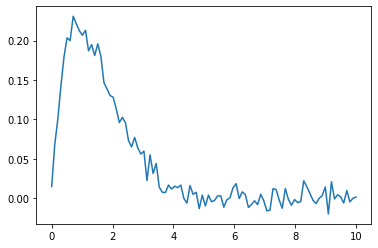

In [50]:
import matplotlib.pyplot as plt
x, y = cn.make_syn_data(100, model='damped sine', params=[0, 1, .1, .01])
plt.plot(x, y)

Now you can start writing your own libraries. When you develop code organizing it into module files you often make changes to functions but Python will not be aware of those changes, even if you reimport the module. A drastic solution is to close the program and restart it but if you execute the following two lines of code the current Python session will be aware of any change written to the file (remember to save files after you change them!) of an imported module. 

In [46]:
%load_ext autoreload
%autoreload 2

code starting with "%" is called a magic line and is a great enhancement of IPython, jupyter notebook and similar platforms.

# Goodies

The following features are not really necessary but they are convenient because they make the code easier to read or more compact or more efficient.  

##  Conditional expressions

Conditional statements are often used to choose one of two values; for example:

In [ ]:
if x > 0:
    y = math.log(x)
else:
    y = float('nan')

This statement checks whether x is positive. If so, it computes math.log. If not, math.log would raise a ValueError. To avoid stopping the program, we generate a “NaN”, which is a special floating-point value that represents “Not a Number”.

We can write this statement more concisely using a conditional expression:

In [54]:
y = math.log(x) if x > 0 else float('nan')

You can almost read this line like English: “y gets log-x if x is greater than 0; otherwise it gets NaN”.

Here we used `math` because `numpy` already returns a NaN when its input is not greater than 0.

In general, you can replace a conditional statement with a conditional expression if both branches contain simple expressions that are either returned or assigned to the same variable.

## List comprehensions

Whenever you need to create a list in an iterative way you can used list comprehension instead of loops.
For example the following code creates a list with the first 10 squares.

In [55]:
x = []
for i in range(10):
    x.append(i**2)
x

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

You can do the same more concisely with:

In [56]:
x = [i**2 for i in range(10)]
x

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

The bracket operators indicate that we are constructing a new list. The expression inside the brackets specifies the elements of the list, and the for clause indicates what sequence we are traversing.

The syntax of a list comprehension is a little awkward because the loop variable, `i` in this example, appears in the expression before we get to the definition.

We can also filter elements from a list comprehension using an if. For example if we only want even squares:

In [57]:
x = [i**2 for i in range(10) if i%2==0]
x

[0, 4, 16, 36, 64]

If we want to use an if/else the syntax changes: we need to use a conditional expression inside the list comprehension. For example if we want to substitute odd squares with NaNs.

In [58]:
x = [i**2 if i%2==0 else np.nan for i in range(10)]
x

[0, nan, 4, nan, 16, nan, 36, nan, 64, nan]

List comprehensions are concise and easy to read, at least for simple expressions. And they are usually faster than the equivalent `for` loops, sometimes much faster.
However list comprehensions are harder to debug so use them only if the computation is simple enough that you are likely to get it right the first time. 

## Generator expressions

Generator expressions are similar to list comprehensions, but with parentheses instead of square brackets:

In [64]:
g = (x**2 for x in range(10))
g

<generator object <genexpr> at 0x7f86c60b30d0>

The result is a generator object that knows how to iterate through a sequence of values. But unlike a list comprehension, it does not compute the values all at once; it waits to be asked. The built-in function `next` gets the next value from the generator:

In [61]:
next(g)

1

When you get to the end of the sequence, `next` raises a `StopIteration` exception. You can also use a for loop to iterate through the values:

In [65]:
for val in g:
     print(val)

0
1
4
9
16
25
36
49
64
81


The generator object keeps track of where it is in the sequence, so the for loop picks up where next left off. Once the generator is exhausted, it continues to raise StopIteration:

In [63]:
next(g)

StopIteration: 

Generator expressions are often used with functions like sum, max, and min:

In [66]:
sum(x**2 for x in range(10))

285

## Gathering keyword args

You already saw how to write a function that gathers its arguments into a tuple:

In [67]:
def printall(*args):
    print(args)

But the * operator doesn’t gather keyword arguments:

To gather keyword arguments, you can use the ** operator:

In [68]:
def printall(*args, **kwargs):
    print(args, kwargs)

You can call the keyword gathering parameter anything you want, but kwargs is a common choice. The result is a dictionary that maps keywords to values:

In [70]:
printall(1, 2.0, third='3', fourth='5')

(1, 2.0) {'third': '3', 'fourth': '5'}


If you have a dictionary of keywords and values, you can use the scatter operator, ** to call a function:

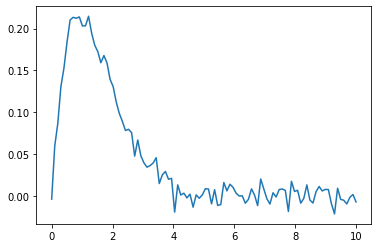

In [71]:
fnc_params = {'model':'damped sine', 'params':[0, 1, .1, .01]}
x, y = cn.make_syn_data(100, **fnc_params)
plt.plot(x, y);

When you are working with functions that have a large number of parameters, it is often useful to create and pass around dictionaries that specify frequently used options.

# Exercises

## Exercise 1

Imaging you just moved to a new lab, where they have done rodents experiments over the past 20 years. They want you to do a new analysis pooling data over all experiments done with mice (they also do rats), using the odd-ball task. 
Fortunately enough they have followed good practices of data storage and organization: all experiments are in a centralized folder and each experiment is in a subfolder, where, together with neural recordings, you find a metadata file in CSV format. All metadata files have a *species* and *task* column (plus several others). 

Write a function that takes a path as parameter (the centralized experiments folder) and returns a list of folder names that correspond to the experiments you are interested into.

Create a folder structure populated with few (let's say about 10) CSV files to simulate the scenario proposed by the exercise. Test your function.

## Exercise 2

Collect all functions you have written so far in a module. Remember to import all modules needed (numpy, etc.) in the your module. Write clear docstrings in case you haven't done so yet.
Try to import and use some function for your module.

## Exercise 3

Change your functions making use of list comprehension, generators, conditional expressions and gathering variables. Test your functions to be sure their output is still the same.